# Author-Rohan Rathi

# Exploratory Data Analysis on Super Store

## Introduction
Super Store, a compact retail establishment situated within the United States, specializes in the sale of Furniture, Office Supplies, and Technology products. Its customer base spans across mass consumer markets, corporate clients, and home offices. Within the dataset, one can find detailed information on individual orders, including sales, profits, and geographical data.

The primary objective of this analysis is to identify areas of weakness and potential opportunities that Super Store can leverage to stimulate and accelerate its business growth.

## Business Questions
- Which Category is the Best Selling and Most Profitable?
- What are the Best Selling and Most Profitable Sub-Categories?
- Which Sub-Category is the Top Seller?
- Among the customer segments, which one is the Most Profitable?
- What is the Preferred Ship Mode for orders?
- Which Region is the Most Profitable for Super Store?
- Which City records the Highest Number of Sales for Super Store?

## Who is Reading this Analysis?

- The intended audience for this analysis comprises the proprietors of Super Store, individuals with a strong emotional and financial investment in their business. 
- These owners may not possess specialized expertise in interpreting charts or comprehending intricate statistical analyses. Therefore, our analysis is designed to be presented in simple, accessible terms.
- Their primary objective is to gather information that empowers them to make strategic decisions aimed at enhancing their business's profitability. As such, our analysis emphasizes the identification of weaknesses and opportunities within the business, offering practical recommendations and marketing strategies to guide their decision-making process.

In [48]:
# Import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [49]:
#read data in csv format
superstore=pd.read_csv('SampleSuperstore.csv')

## Data Exploration

In [8]:
#First 5 rows of dataset
superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
#Last 5 rows of dataset
superstore.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


It's evident that the dataset comprises a diverse range of data types, encompassing categorical, geographical, and numerical variables. 

Every row in the dataset signifies an individual order for an item, capturing essential details such as the quantity ordered, sales revenue, discount applied, and the resulting profit. Additionally, information regarding the chosen shipping method and customer segment is included, along with geographical elements.

To gain a more comprehensive understanding of the dataset, we'll proceed to employ both `df.shape()` and `df.info()` methods to extract further insights.

In [11]:
superstore.shape

(9994, 13)

In [12]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Data Cleaning

Firstly, we should clean the data which is very necessary, hence we should look at common issues such as missing and duplicate data. Also, we will check if any null values are present in the dataset.

In [13]:
#Checking for the null values
superstore.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

We can see, there are no null values presentt in the dataset.

Now, we will find out if there is any duplicate data.

In [14]:
#Find the number of duplicate data
superstore.duplicated().sum()

17

There are total 17 duplicate rows.

In [15]:
#Show duplicate rows
superstore[superstore.duplicated(keep = 'last')]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
3405,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588


We dont want duplicate rows, hence we will drop them.

In [16]:
#Drop the duplicate rows
superstore.drop_duplicates(inplace = True)

In [17]:
superstore.shape #now the no of rows and columns left after dropping duplicate rows

(9977, 13)

In [18]:
#Now we will find profit margin which is (profit/sales)*100
superstore['Profit Margin %'] = (superstore.Profit / superstore.Sales) * 100
superstore

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,16.25
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,17.00
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932,7.50
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,45.00


## Exploratory Data Analysis
 Which Category is Best Selling and Most Profitable?

In [24]:
category_analysis = pd.DataFrame(superstore.groupby(['Category'])[['Sales', 'Profit','Quantity']].sum())
category_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,741999.7953,18451.2728,8028
Office Supplies,719047.0320,122490.8008,22906
Technology,836154.0330,145454.9481,6939


In [25]:
# Count the total repeatable states
superstore['State'].value_counts()

State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada  

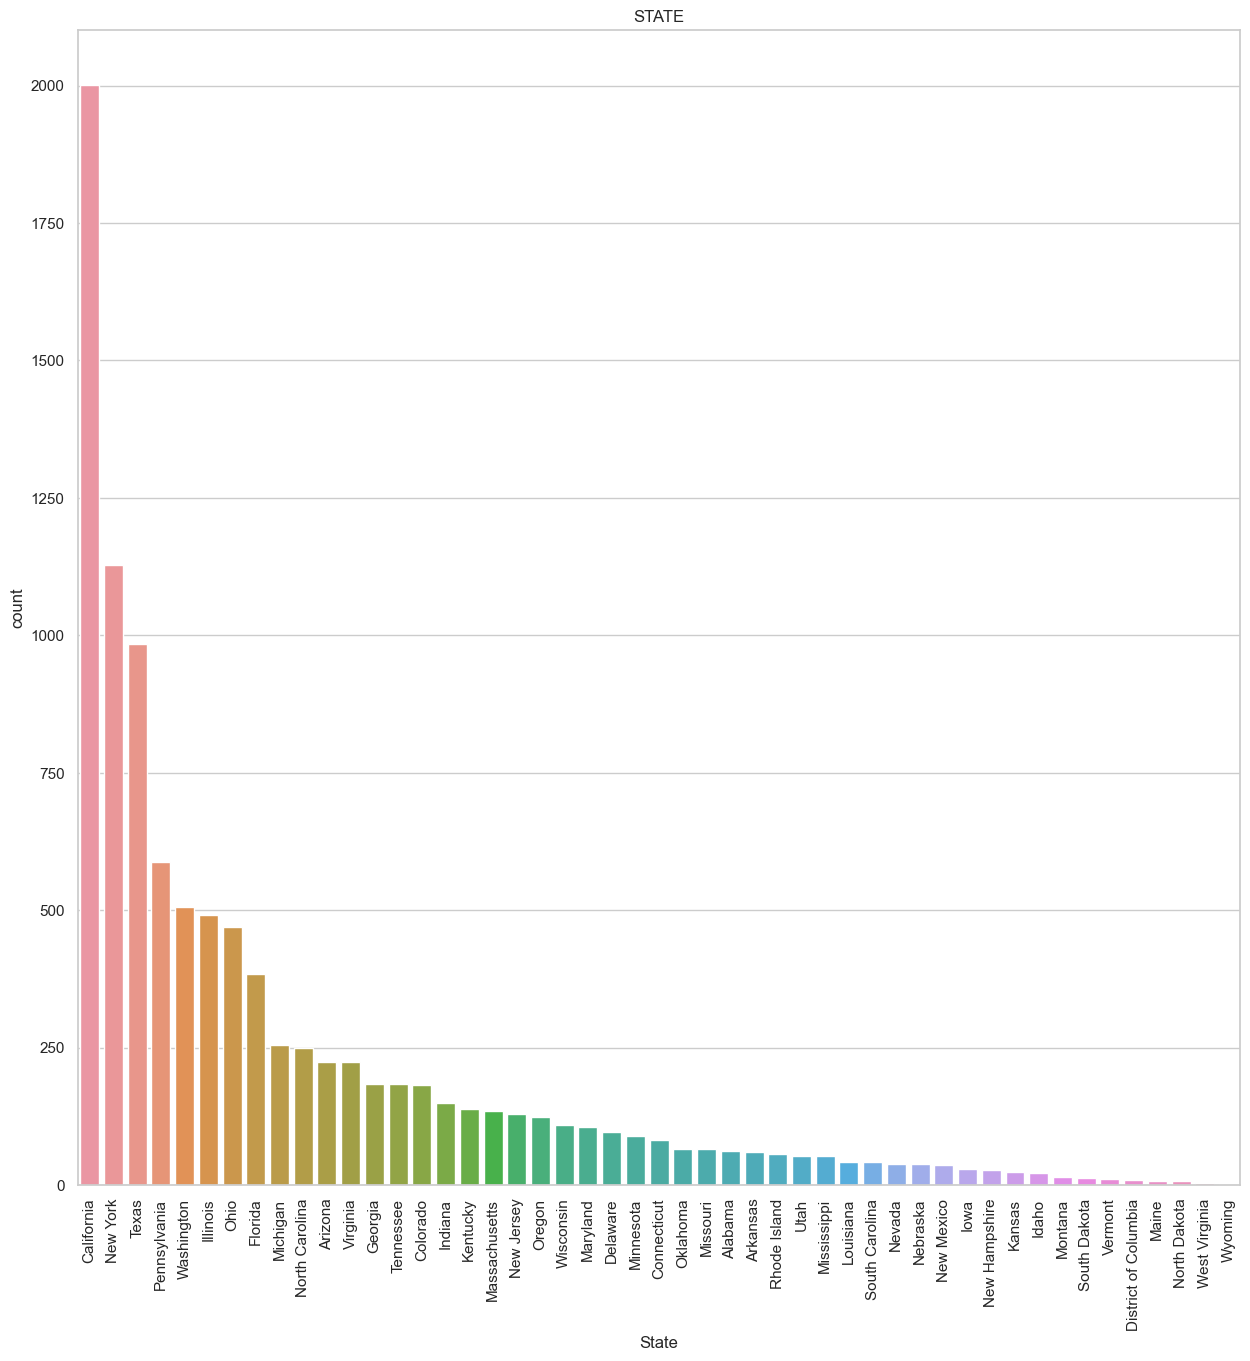

In [19]:
plt.figure(figsize=(15,15))
sns.countplot(x=superstore['State'],order=superstore['State'].value_counts().index)
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

Highest no of buyers are from California And New York

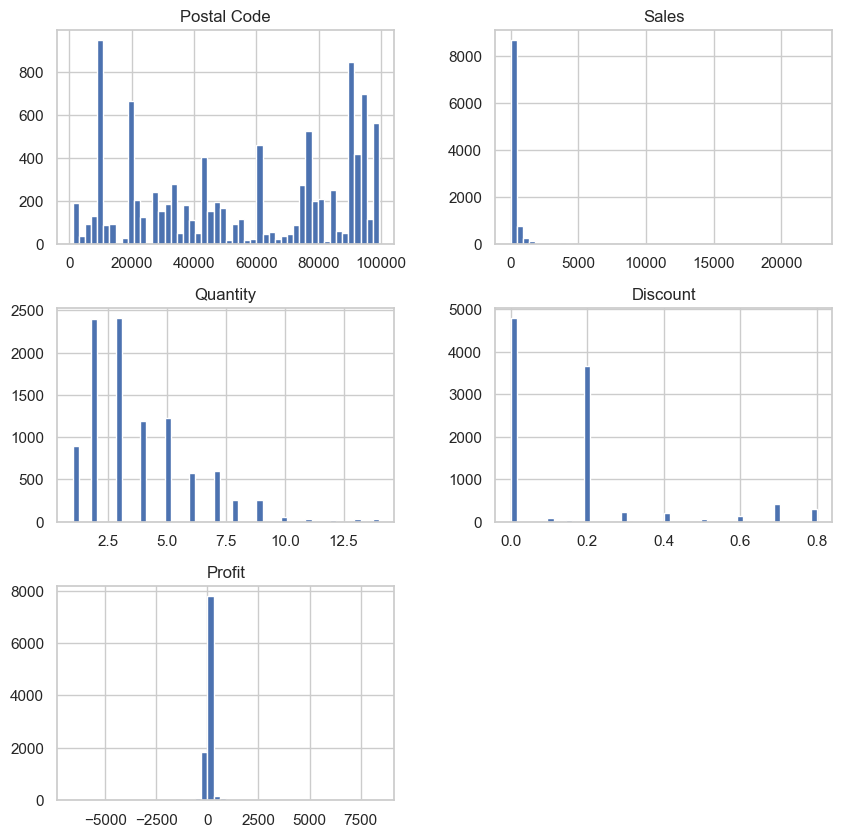

In [23]:
superstore.hist(figsize=(10,10),bins=50)
plt.show()

Most customers tends to buy quantity of 2 and 3 and 
Discount given is maximum 0.8 percent

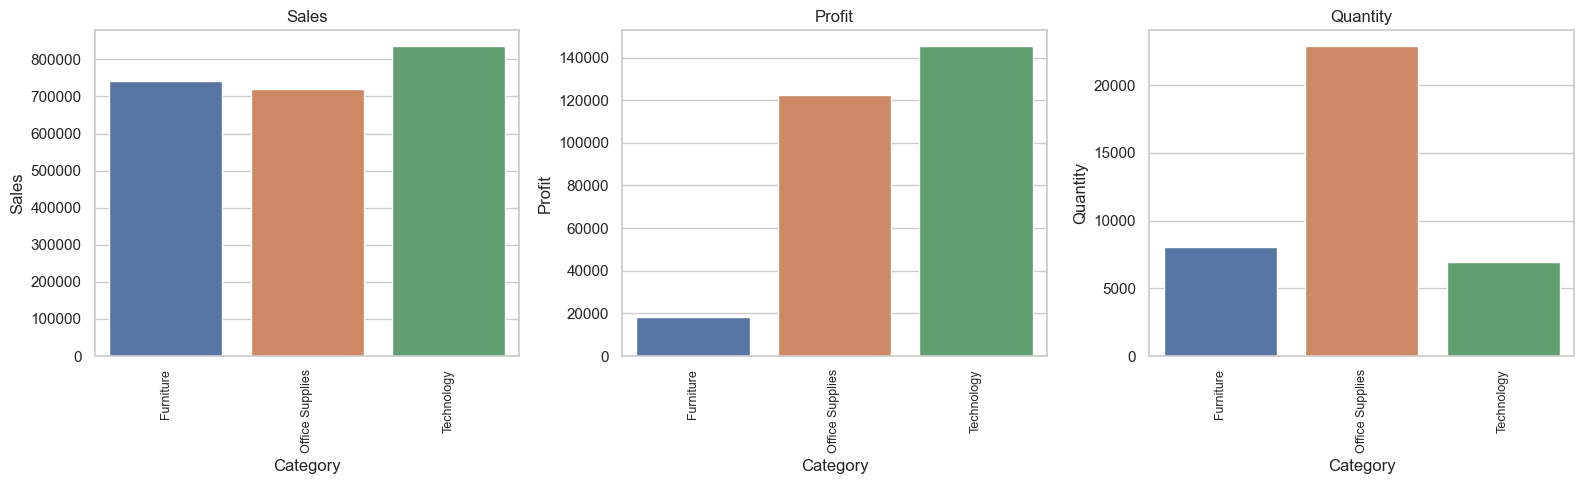

In [27]:
# Set for grouped plots - figure with a 1x3 grid of Axes
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(16, 5))  # Increase the figsize for better visibility

# Plot barplots
cat1 = sns.barplot(x=category_analysis.index, y=category_analysis.Sales, ax=axis[0])
cat2 = sns.barplot(x=category_analysis.index, y=category_analysis.Profit, ax=axis[1])
cat3 = sns.barplot(x=category_analysis.index, y=category_analysis.Quantity, ax=axis[2])

# Set titles
cat1.set(title='Sales')
cat2.set(title='Profit')
cat3.set(title='Quantity')

# Rotate axis for x-axis
for ax in axis:
    plt.setp(ax.get_xticklabels(), rotation='vertical', size=9)

# Set spacing between subplots
figure.tight_layout()


Here we can conclude that sales are almost equal in all the three categories but the profit in furniture is very less compared tp office suplies and technology

Also, since office supplies are used in daily basis and they are not long lasting, hence more quantity of office supplies are produced.But, technology product once purchased can be used for 2-15 years, hence less quantities of this product are produced 

What are the best selling and most profitable sub-category? 

In [12]:
#Group by Subcategory
scategory_analysis = pd.DataFrame(superstore.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())

In [13]:
scategory_analysis

,Sales,Profit
Sub-Category,,
Accessories,167380.3180,41936.6357
Appliances,107532.1610,18138.0054
Art,27118.7920,6527.7870
Binders,203412.7330,30221.7633
Bookcases,114879.9963,-3472.5560
Chairs,328449.1030,26590.1663
Copiers,149528.0300,55617.8249
Envelopes,16476.4020,6964.1767
Fasteners,3024.2800,949.5182


In [14]:
#sort in descending order according to sales
scat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
scat_sales

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,328449.1030,26590.1663
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203412.7330,30221.7633
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [15]:
# Sort by descending order according to profit
scat_profit = pd.DataFrame(subcat_analysis.sort_values('Profit', ascending = False))
scat_profit

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78479.2060,34053.5693
Binders,203412.7330,30221.7633
Chairs,328449.1030,26590.1663
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91705.1640,13059.1436


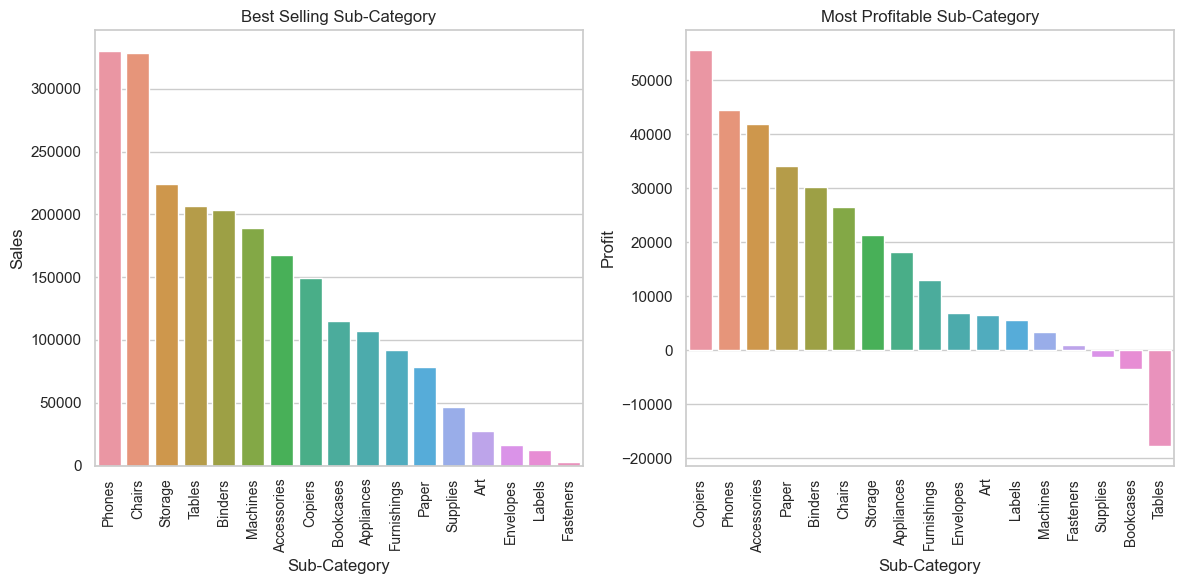

In [17]:
# Plot Bar Plots
sns.set_theme(style="whitegrid")

# Create a figure with a 1x2 grid of Axes
figure, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data=scat_sales, x=scat_sales.index, y=scat_sales.Sales, ax=axes[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(), rotation="vertical", size=10)

# Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data=scat_profit, x=scat_profit.index, y=scat_profit.Profit, ax=axes[1])
subcat2.set(title="Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(), rotation="vertical", size=10)

# Set spacing between subplots
figure.tight_layout()

plt.show()


We can find the top-selling subcategories 

In [31]:
scat_quantity = pd.DataFrame(superstore.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))
scat_quantity

,Quantity
Sub-Category,
Binders,5974
Paper,5178
Furnishings,3563
Phones,3289
Storage,3158
Art,3000
Accessories,2976
Chairs,2356
Appliances,1729


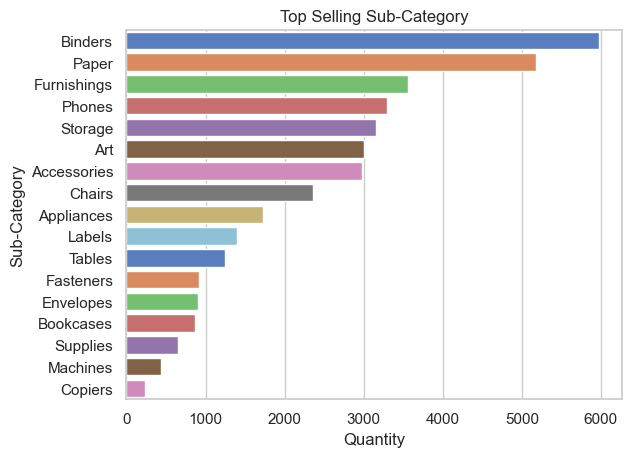

In [34]:
# Plot Bar Plot for Top Selling Sub-Category
sns.set_theme(style="whitegrid")
sns.barplot(data=scat_quantity, y=scat_quantity.index, x=scat_quantity.Quantity, palette="muted")
plt.title("Top Selling Sub-Category")
plt.xlabel("Quantity")  # Added an x-axis label for clarity
plt.ylabel("Sub-Category")  # Added a y-axis label for clarity
plt.show()

#A "muted" palette is a type of color palette commonly used in data visualization to create plots
#with a more subdued and less vibrant color scheme. Muted palettes are characterized by their use 
#of softer and less intense colors, which can be particularly useful when you want to convey 
# information without overwhelming the viewer with bright or aggressive colors.



Here, we can see that binders are the most-selling subcategory whereas copiers are the least-seeling subcategories.

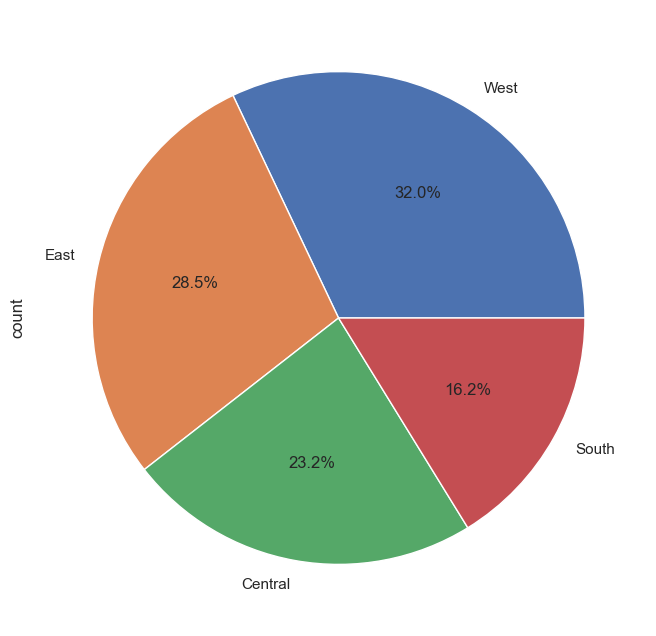

In [35]:
plt.figure(figsize=(10,8))
superstore['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()
#(autopct='%1.1f%%'): This parameter specifies the format for displaying the percentage labels on 
#the pie chart. In this case, it's set to display one decimal place for the percentages followed 
# by a percentage symbol (e.g., "25.5%").

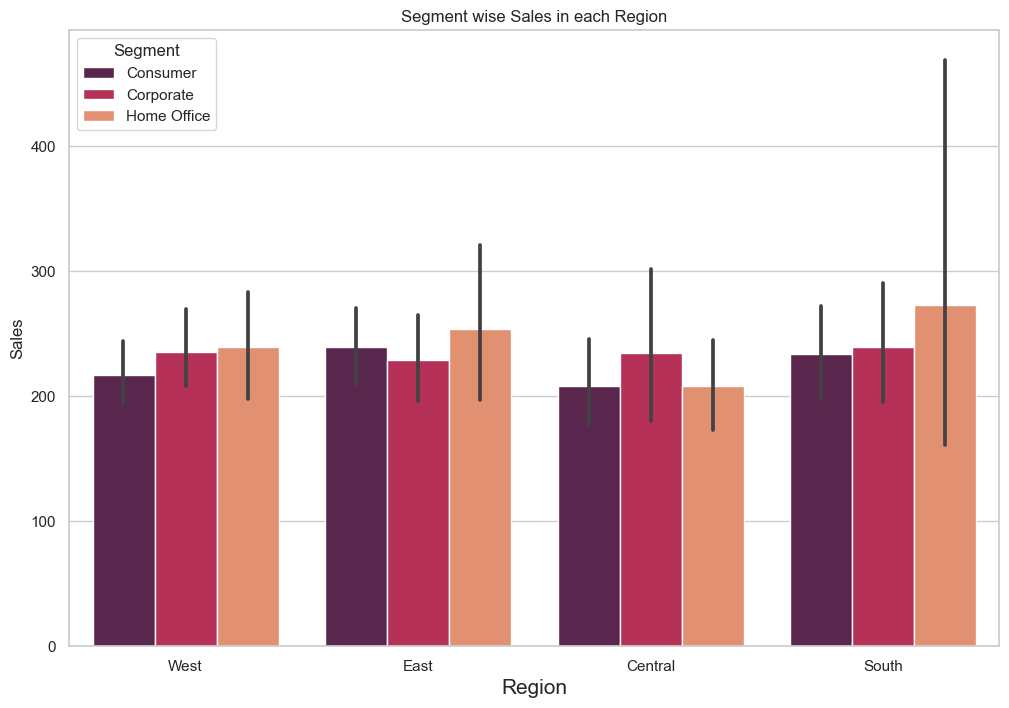

In [27]:
#Segment Wise Sales in each Region
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=superstore,hue='Segment',order=superstore['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()
#'palette'='rocket': The 'palette' parameter specifies the color palette to be used for coloring the bars. 'Rocket' is one of the predefined Seaborn palettes.

Here we can see the sales in all the regions and with the segments , i.e., Consumer, Corporate and Home Office and we can conclude that segment wise sales are almost same in every region

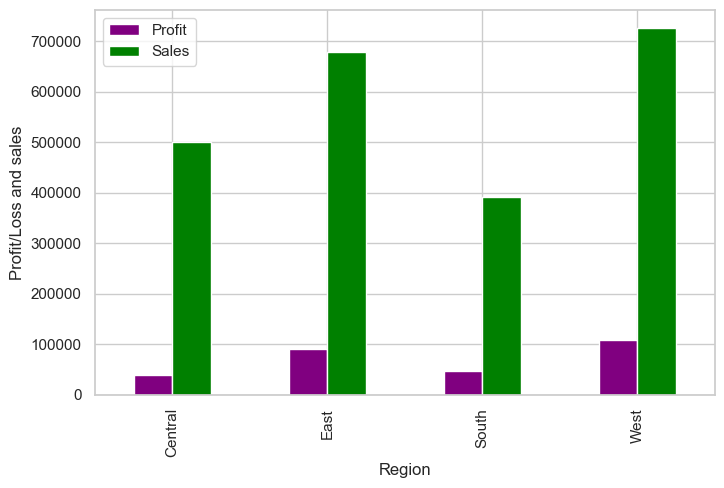

In [30]:
superstore.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['purple','green'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()


Here we can conclude that in west region sales and the profit is maximum whereas it is minimum in south region.

Now, we will se which is the most preferred ship mode 

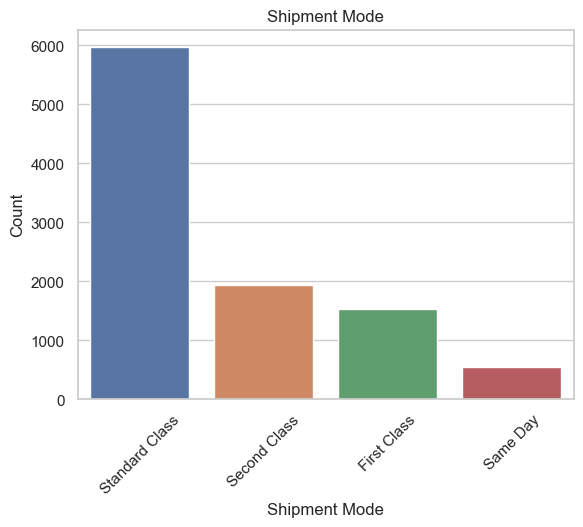

In [37]:
# Plot shipment mode using a bar chart
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
sns.barplot(data=superstore, x=superstore['Ship Mode'].value_counts().index, y=superstore['Ship Mode'].value_counts())
plt.title("Shipment Mode")
plt.xlabel("Shipment Mode")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
#.index is used in this context to extract the unique shipment modes from the Series produced by 
# value_counts()

By this barplot we can conclude that the shipment mode is generally preferred in standard class because it is cheaper. The other modes are not popular among the customers and may be too costly.

# Highest no of sales in a city

In [40]:
city_sales = pd.DataFrame(superstore.groupby(['City'])[['Sales', 'Quantity']].sum().sort_values(by='Sales', ascending=False))
top10=city_sales[:10]
top10

,Sales,Quantity
City,,
New York City,256368.1610,3417
Los Angeles,175851.3410,2879
Seattle,119540.7420,1590
San Francisco,112669.0920,1935
Philadelphia,109077.0130,1981
Houston,64504.7604,1466
Chicago,48539.5410,1132
San Diego,47521.0290,670
Jacksonville,44713.1830,429


In [41]:
bottom10 = city_sales[-10:]
bottom10

,Sales,Quantity
City,,
Missouri City,6.370,7
Keller,6.000,2
Layton,4.960,4
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


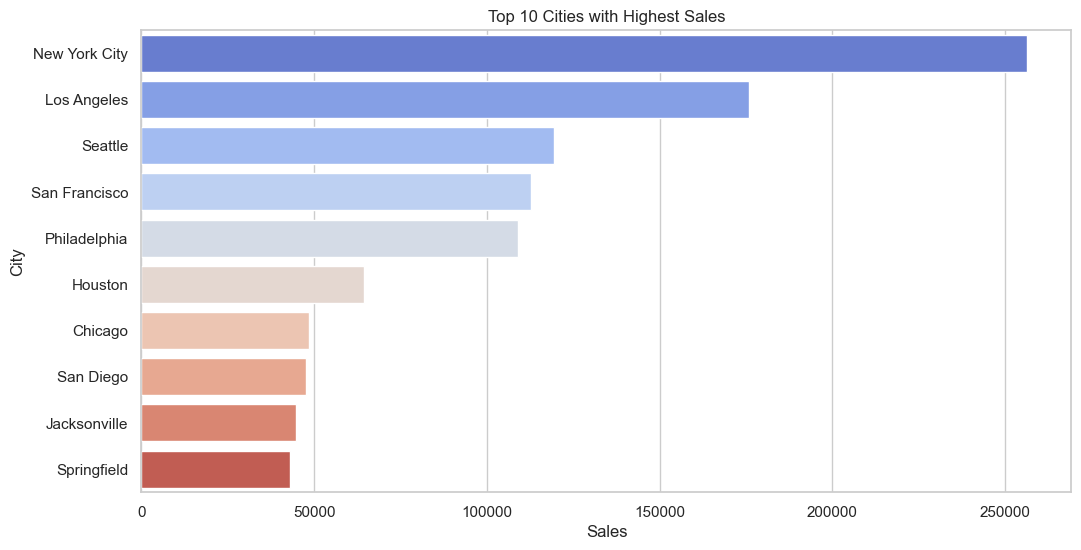

In [50]:
# Set the plot style
sns.set_theme(style="whitegrid")

# Create a bar plot for the top 10 cities with highest sales
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(data=top10, x='Sales', y=top10.index, palette='coolwarm')
plt.title("Top 10 Cities with Highest Sales")
plt.xlabel("Sales")
plt.ylabel("City")

# Show the plot
plt.show()

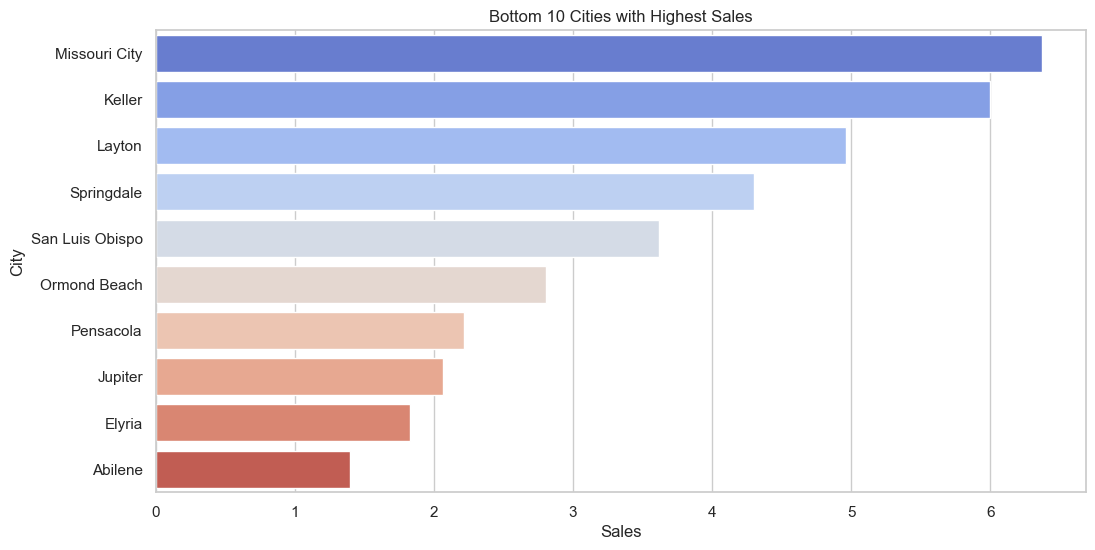

In [51]:
# Set the plot style
sns.set_theme(style="whitegrid")

# Create a bar plot for the top 10 cities with highest sales
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(data=bottom10, x='Sales', y=bottom10.index, palette='coolwarm')
plt.title("Bottom 10 Cities with Highest Sales")
plt.xlabel("Sales")
plt.ylabel("City")

# Show the plot
plt.show()

There is a significant gap between the cities with the highest and lowest sales, emphasizing the need for a marketing strategy focused on the top 10 cities.

## THANKYOU<3